In [2]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


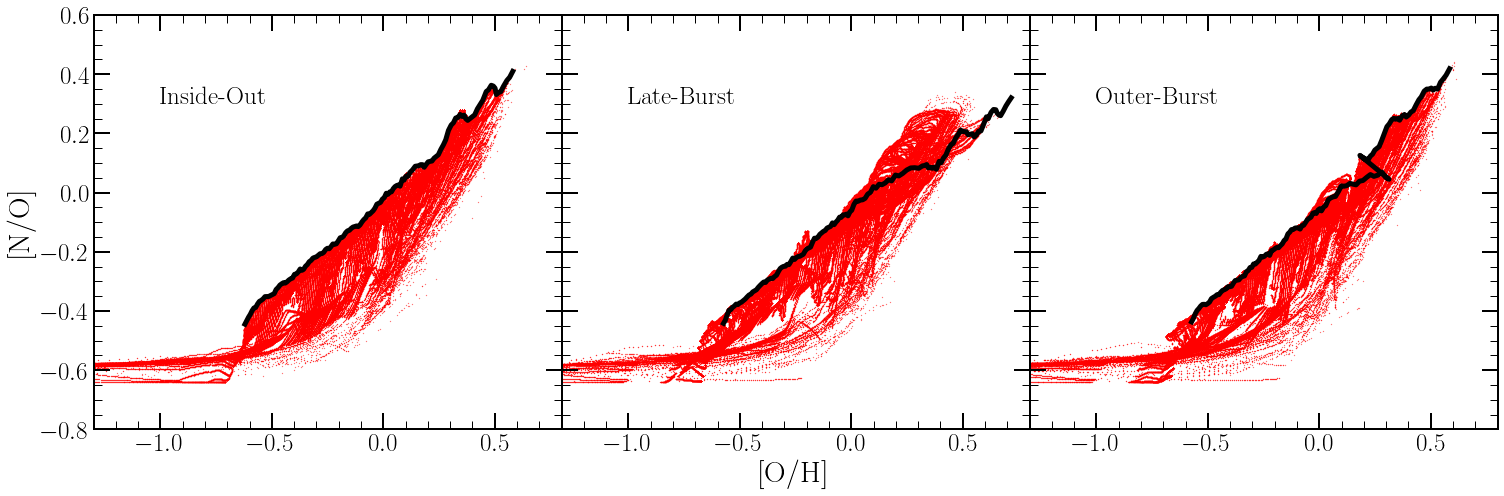

In [17]:
fig = plt.figure(figsize = (21, 7), facecolor = "white") 
axes = 3 * [None] 
for i in range(3): 
    axes[i] = fig.add_subplot(131 + i) 
    axes[i].set_xlim([-1.3, 0.8]) 
    axes[i].set_ylim([-0.8, 0.6]) 
    if i: plt.setp(axes[i].get_yticklabels(), visible = False) 
axes[1].set_xlabel("[O/H]") 
axes[0].set_ylabel("[N/O]") 
outputs = [
    "../outputs/diffusion/insideout", 
    "../outputs/diffusion/lateburst", 
    "../outputs/diffusion/outerburst" 
] 
labels = ["Inside-Out", "Late-Burst", "Outer-Burst"] 
outputs = [vice.output(_) for _ in outputs] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(3): 
    axes[i].text(-1, 0.3, labels[i], fontsize = 25) 
    axes[i].plot([outputs[i].zones[_].history["[o/h]"][-1] for _ in zones], 
        [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones], 
        c = plots.mpltoolkit.named_colors()["black"], 
        linewidth = 5) 
    extra = np.genfromtxt("%s_analogdata.out" % (outputs[i].name)) 
    outputs[i].stars["abszfinal"] = [abs(row[-1]) for row in extra][:outputs[i].stars.size[0]] 
    stars = outputs[i].stars.filter(
        "zone_final", ">=", 30).filter(
        "zone_final", "<=", 154).filter(
        "abszfinal", "<=", 2.0) 
    axes[i].scatter(stars["[o/h]"], stars["[n/o]"], s = 0.2, marker = plots.mpltoolkit.markers()["point"], 
        c = plots.mpltoolkit.named_colors()["red"]) 
plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 